In [1]:
#### Importar librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import glob
from PIL import Image
warnings.filterwarnings('ignore')

#### Definir directorio
os.chdir('../')

In [2]:
os.getcwd()

'c:\\Users\\aleja\\Documents\\Pry_ADySP_\\Presidentes_Peru_image_recognition'

In [3]:
#### Procesa imagenes para homolagar 
def get_images(path):
    images = []
    for img_path in glob.glob(path): 
        img = Image.open(img_path).convert('RGB')
        img = img.resize((500,500))
        img = np.array(img)
        images.append(img)
    return np.array(images)    

In [4]:
#### Lista de presidentes de la ultima decada 
presidentes = ['1.Valentin Paniagua', '2.Alejandro Toledo', '3.Alan Garcia', '4.Ollanta Humala', '5.Pedro Pablo Kuczynski', '6.Martin Vizcarra', '7.Manuel Merino', '8.Francisco Sagasti', '9.Pedro Castillo', '10.Dina Boluarte']

all_images = []

for presidentes in presidentes :
    images = get_images(f'data_set/{presidentes}/*')
    all_images.append(images)
    print(f'End processing: {presidentes}')

End processing: 1.Valentin Paniagua
End processing: 2.Alejandro Toledo
End processing: 3.Alan Garcia
End processing: 4.Ollanta Humala
End processing: 5.Pedro Pablo Kuczynski
End processing: 6.Martin Vizcarra
End processing: 7.Manuel Merino
End processing: 8.Francisco Sagasti
End processing: 9.Pedro Castillo
End processing: 10.Dina Boluarte


In [5]:
#### Creamos las clases para cada presidente 
images = []
classes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y = []

for class_ in classes:
    for i in range(0, len(all_images[class_])):
        images.append(all_images[class_][i,:,:,:])
        y.append(class_)

In [6]:
#### separamos la data para entrenamiento
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, y, test_size=0.2, random_state=452)


In [7]:
from tensorflow.keras.utils import to_categorical
x_train_esc = np.array(x_train)/255
x_test_esc = np.array(x_test)/255

y_train_cat = to_categorical(y_train)

In [8]:
print(x_test_esc.shape)

(248, 500, 500, 3)


In [39]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from keras import backend as k

k.clear_session()
#tf.compat.v1.reset_default_graph()

# Definir el modelo
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(500, 500, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(124, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Dropout(0.5), 

    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    #Dropout(0.3),

    #Conv2D(512, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),
    
    # Dropout(0.3),

    #Conv2D(1024, (3, 3), activation='relu'),
    #MaxPooling2D((2, 2)),


    Flatten(),
    Dense(10, activation='softmax')
])

model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',  ### Modelos multiclass
              metrics = ['accuracy'])

In [40]:
#### entrenar fit

model.fit(x_train_esc, y_train_cat, epochs= 7, batch_size =10, validation_split = 0.2)

Epoch 1/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 32s 400ms/step - accuracy: 0.1634 - loss: 2.9249 - val_accuracy: 0.2172 - val_loss: 2.2266
Epoch 2/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 390ms/step - accuracy: 0.2298 - loss: 2.1883 - val_accuracy: 0.2424 - val_loss: 2.1319
Epoch 3/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 387ms/step - accuracy: 0.3191 - loss: 1.9231 - val_accuracy: 0.3434 - val_loss: 2.1595
Epoch 4/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 392ms/step - accuracy: 0.7122 - loss: 0.9036 - val_accuracy: 0.3232 - val_loss: 2.4543
Epoch 5/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 392ms/step - accuracy: 0.9224 - loss: 0.2577 - val_accuracy: 0.3737 - val_loss: 4.9010
Epoch 6/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 388ms/step - accuracy: 0.9932 - loss: 0.0364 - val_accuracy: 0.3485 - val_loss: 6.8214
Epoch 7/7
79/79 ━━━━━━━━━━━━━━━━━━━━ 31s 389ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.3434 - val_loss: 8.6484


In [42]:
#### Datos de Train
preds = model.predict(x_test_esc)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 357ms/step


In [43]:

#### Datos de entrenamiento 
y_pred = []
for i in range(0,preds.shape[0]):
    y_pred.append(np.argmax(preds[i]))

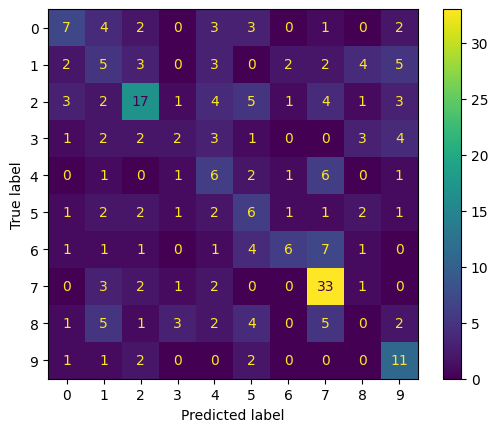

In [44]:
#### Performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
#### Lista de presidentes de la ultima decada 
#  '1.Valentin Paniagua', '2.Alejandro Toledo', '3.Alan Garcia', '4.Ollanta Humala', '5.Pedro Pablo Kuczynski', '6.Martin Vizcarra', '7.Manuel Merino', '8.Francisco Sagasti', '9.Pedro Castillo', '10.Dina Boluarte'
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
disp.plot()
plt.show()

In [45]:
accuracy_score(y_test,y_pred)

0.375